In [1]:
import numpy as np
import pennylane as qml
import QuantumOperations as q
from ClassicalOperations import ClassicalOperations
import matplotlib.pyplot as plt

import pandas as pd
import datetime

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
c = ClassicalOperations()

#### SUM

In [3]:
# wires
wires=['q0','q1','q2']
# device
dev = qml.device('default.qubit', wires=wires, shots=100000, analytic=None)

# circuit
def func(input_):
    
    # insert input
    for i in range(len(wires)):
        if input_[i] == 1:
            qml.PauliX(wires=wires[i])
    
    # circuit
    q.SUM(wires=wires)
    
    return qml.probs(wires)

# QNode
circuit = qml.QNode(func,dev)

In [4]:
states = c.states_vector(wires)
result = circuit([1,0,0])
np.vstack([states,result]).T

array([['|000>', '0.0'],
       ['|001>', '0.0'],
       ['|010>', '0.0'],
       ['|011>', '0.0'],
       ['|100>', '0.0'],
       ['|101>', '1.0'],
       ['|110>', '0.0'],
       ['|111>', '0.0']], dtype='<U32')

#### CARRY

In [5]:
# wires
wires=[i for i in range(4)]
# device
dev = qml.device('default.qubit', wires=wires, shots=100, analytic=None)

# circuit
def func(input_):
    
    # insert input
    for i in range(len(wires)):
        if input_[i] == 1:
            qml.PauliX(wires=wires[i])
    
    # circuit
    q.CARRY(wires=wires)
#     q.CARRY_inv(wires=wires)
    
    return qml.probs(wires)

# QNode
circuit = qml.QNode(func,dev)

In [6]:
states = c.states_vector(wires)
result = circuit([0,1,0,0])
np.vstack([states,result]).T

array([['|0000>', '0.0'],
       ['|0001>', '0.0'],
       ['|0010>', '0.0'],
       ['|0011>', '0.0'],
       ['|0100>', '0.0'],
       ['|0101>', '0.0'],
       ['|0110>', '1.0'],
       ['|0111>', '0.0'],
       ['|1000>', '0.0'],
       ['|1001>', '0.0'],
       ['|1010>', '0.0'],
       ['|1011>', '0.0'],
       ['|1100>', '0.0'],
       ['|1101>', '0.0'],
       ['|1110>', '0.0'],
       ['|1111>', '0.0']], dtype='<U32')

#### ADDER

In [7]:
# wires
wires=[i for i in range(7)]
# device
dev = qml.device('default.qubit', wires=wires, shots=100, analytic=None)

# circuit
def func(input_):
    
    # insert input
    for i in range(len(wires)):
        if input_[i] == 1:
            qml.PauliX(wires=wires[i])
    
    # circuit
    q.ADDER(wires=wires)
#     q.ADDER_inv(wires=wires)
    
    return qml.probs(wires)

# QNode
circuit = qml.QNode(func,dev)

In [8]:
states = c.states_vector(wires)
result = circuit([1,0,1,0,1,0,0])

In [9]:
res = np.vstack([states,result]).T
res[np.where(res[:,1] == '1.0')]

array([['|1001100>', '1.0']], dtype='<U32')

#### Controlled_reset_zero_register_to_N

In [10]:
# wires
wires=[i for i in range(7)]
# device
dev = qml.device('default.qubit', wires=wires, shots=100, analytic=None)

# circuit
def func(input_):
    
    # insert input
    for i in range(len(wires)):
        if input_[i] == 1:
            qml.PauliX(wires=wires[i])
    
    # circuit
    q.Controlled_reset_zero_register_to_N(21,wires=wires)
#     q.Controlled_reset_zero_register_to_N(21,wires=wires)
    
    return qml.probs(wires)

# QNode
circuit = qml.QNode(func,dev)

In [11]:
states = c.states_vector(wires)
result = circuit([1,0,0,0,0,0,0])

In [12]:
res = np.vstack([states,result]).T
res[np.where(res[:,1] == '1.0')]

array([['|1101010>', '1.0']], dtype='<U32')

#### ADDER_MOD

In [13]:
N = 6
bits_for_register_with_a_number = 3

# wires
wires=[i for i in range(bits_for_register_with_a_number*4+2)]
# device
dev = qml.device('default.qubit', wires=wires, shots=100, analytic=None)

# circuit
def func(input_):
    
    # check if N is put in the register wires_N
    str_N = str()
    for i in reversed(input_[3*bits_for_register_with_a_number+1:4*bits_for_register_with_a_number+1]):
        str_N = str_N + str(i)
    if N != int(str_N,2):
        raise Exception('Register wires_N is not set to be equal to N')
    
    # insert input
    for i in range(len(wires)):
        if input_[i] == 1:
            qml.PauliX(wires=wires[i])
    
    # circuit
    q.ADDER_MOD(N,wires=wires)
#     q.ADDER_MOD_inv(N,wires=wires)
    
    return qml.probs(wires)

# QNode
circuit = qml.QNode(func,dev)

In [14]:
start = datetime.datetime.now()

states = c.states_vector(wires)
res_list = list()

# Full computational basis check
input_wires_c = [0 for i in range(bits_for_register_with_a_number)]
str_N_reverse = bin(N)[2:][::-1]+'0'*(bits_for_register_with_a_number-len(bin(N)[2:]))
input_wires_Nt = [int(i) for i in str_N_reverse] + [0]
for i in range(2**(2*bits_for_register_with_a_number)):
    # set any value in wires_a and wires_b, but the last bit in wires_b should be 0
    input_str = '0'*((2*bits_for_register_with_a_number)-len(bin(i)[2:])) + bin(i)[2:] +'0'
    # arbitrary input in wires_a and wires_b + zeros in wires_c + binary representation of N in wires_N + 0 in wires_t
    input_ = [int(input_str[j]) for j in range(len(input_str))]+input_wires_c+input_wires_Nt
    
    measurements = circuit(input_)
    res_list.append([input_str,states[np.where(measurements>0.5)[0][0]]])
    
    print(input_,'done')

end = datetime.datetime.now()
print(end-start)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0] done
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

##### Note that the requirement for correct output is 0 <= a,b, < N

In [15]:
df = pd.DataFrame(res_list)

df['a_bin'] = df[0].str.slice(start=0,stop=bits_for_register_with_a_number).str.slice(step=-1)
df['b_bin'] = df[0].str.slice(start=bits_for_register_with_a_number,stop=2*bits_for_register_with_a_number+1).str.slice(step=-1)
df['N_bin'] = df[1].str.slice(start=3*bits_for_register_with_a_number+2,stop=4*bits_for_register_with_a_number+2).str.slice(step=-1)
df['a+b mod(N)_bin'] = df[1].str.slice(start=bits_for_register_with_a_number+1,stop=2*bits_for_register_with_a_number+2).str.slice(step=-1)

df['a'] = df['a_bin'].apply(int, args=(2,))
df['b'] = df['b_bin'].apply(int, args=(2,))
df['N'] = df['N_bin'].apply(int, args=(2,))
df['a+b mod(N)'] = df['a+b mod(N)_bin'].apply(int, args=(2,))

df['correctness'] = (df['a']+df['b'])%df['N'] == df['a+b mod(N)']

df.sort_values(by=['a','b'])

,0,1,a_bin,b_bin,N_bin,a+b mod(N)_bin,a,b,N,a+b mod(N),correctness
0,0000000,|00000000000110>,000,0000,110,0000,0,0,6,0,True
4,0001000,|00010000000110>,000,0001,110,0001,0,1,6,1,True
2,0000100,|00001000000110>,000,0010,110,0010,0,2,6,2,True
6,0001100,|00011000000110>,000,0011,110,0011,0,3,6,3,True
1,0000010,|00000100000110>,000,0100,110,0100,0,4,6,4,True
5,0001010,|00010100000110>,000,0101,110,0101,0,5,6,5,True
3,0000110,|00000000000111>,000,0110,110,0000,0,6,6,0,True
7,0001110,|00010000000111>,000,0111,110,0001,0,7,6,1,True
32,1000000,|10010000000110>,001,0000,110,0001,1,0,6,1,True
36,1001000,|10001000000110>,001,0001,110,0010,1,1,6,2,True


#### Ctrl_MULT_MOD

In [16]:
bits_for_register_with_a_number = 3

# wires
wires=[i for i in range(bits_for_register_with_a_number*5+3)]

# device
dev = qml.device('default.qubit', wires=wires, shots=100, analytic=None)

# circuit
def func(N,m,input_):
    
    # insert input
    for i in range(len(wires)):
        if input_[i] == 1:
            qml.PauliX(wires=wires[i])
    
    # circuit
    q.Ctrl_MULT_MOD(N,m,wires=wires)
    
    return qml.probs(wires)

# QNode
circuit = qml.QNode(func,dev)

In [17]:
# full check

start = datetime.datetime.now()

m_range = np.arange(2**bits_for_register_with_a_number)
N_range = np.arange(1,2**bits_for_register_with_a_number)

str_wires_a = '0'*bits_for_register_with_a_number
str_wires_b = '0'*(bits_for_register_with_a_number+1)
str_wires_c = '0'*bits_for_register_with_a_number
for m_ in m_range:
    for N_ in N_range:
        
        # check all values for z with two-qubit register wires_z
        for z in range(2**bits_for_register_with_a_number):
            input_str = '1' + bin(z)[2:][::-1] + '0'*(bits_for_register_with_a_number-len(bin(z)[2:]))+\
                            str_wires_a + str_wires_b + str_wires_c +\
                            bin(N_)[2:][::-1] + '0'*(bits_for_register_with_a_number-len(bin(N_)[2:]))+\
                            '0'
            input_ = [int(i) for i in input_str]
            states = c.states_vector(wires)
            measurements = circuit(N_,m_,input_)
            # result from wires_b
            binary_result = states[np.where(measurements>0.5)[0][0]][2*bits_for_register_with_a_number+2:\
                                                                     3*bits_for_register_with_a_number+3][::-1]
            
            correctness = (z*m_)%N_ == int(binary_result,2)
            print('restriction = '+str((m_*(2**(bits_for_register_with_a_number-1)) < N_))+',     z = '+str(z)+', [m,N] = ['+str(m_)+','+str(N_)+']: z*m mod N = '+\
                  str(z)+'*'+str(m_)+' mod '+str(N_)+' = '+binary_result+'     Correctness:'+str(correctness))

end = datetime.datetime.now()
print(end-start)

restriction = True,     z = 0, [m,N] = [0,1]: z*m mod N = 0*0 mod 1 = 0000     Correctness:True
restriction = True,     z = 1, [m,N] = [0,1]: z*m mod N = 1*0 mod 1 = 0000     Correctness:True
restriction = True,     z = 2, [m,N] = [0,1]: z*m mod N = 2*0 mod 1 = 0000     Correctness:True
restriction = True,     z = 3, [m,N] = [0,1]: z*m mod N = 3*0 mod 1 = 0000     Correctness:True
restriction = True,     z = 4, [m,N] = [0,1]: z*m mod N = 4*0 mod 1 = 0000     Correctness:True
restriction = True,     z = 5, [m,N] = [0,1]: z*m mod N = 5*0 mod 1 = 0000     Correctness:True
restriction = True,     z = 6, [m,N] = [0,1]: z*m mod N = 6*0 mod 1 = 0000     Correctness:True
restriction = True,     z = 7, [m,N] = [0,1]: z*m mod N = 7*0 mod 1 = 0000     Correctness:True
restriction = True,     z = 0, [m,N] = [0,2]: z*m mod N = 0*0 mod 2 = 0000     Correctness:True
restriction = True,     z = 1, [m,N] = [0,2]: z*m mod N = 1*0 mod 2 = 0000     Correctness:True
restriction = True,     z = 2, [m,N] = [

restriction = False,     z = 6, [m,N] = [1,4]: z*m mod N = 6*1 mod 4 = 0010     Correctness:True
restriction = False,     z = 7, [m,N] = [1,4]: z*m mod N = 7*1 mod 4 = 0011     Correctness:True
restriction = True,     z = 0, [m,N] = [1,5]: z*m mod N = 0*1 mod 5 = 0000     Correctness:True
restriction = True,     z = 1, [m,N] = [1,5]: z*m mod N = 1*1 mod 5 = 0001     Correctness:True
restriction = True,     z = 2, [m,N] = [1,5]: z*m mod N = 2*1 mod 5 = 0010     Correctness:True
restriction = True,     z = 3, [m,N] = [1,5]: z*m mod N = 3*1 mod 5 = 0011     Correctness:True
restriction = True,     z = 4, [m,N] = [1,5]: z*m mod N = 4*1 mod 5 = 0100     Correctness:True
restriction = True,     z = 5, [m,N] = [1,5]: z*m mod N = 5*1 mod 5 = 0000     Correctness:True
restriction = True,     z = 6, [m,N] = [1,5]: z*m mod N = 6*1 mod 5 = 0001     Correctness:True
restriction = True,     z = 7, [m,N] = [1,5]: z*m mod N = 7*1 mod 5 = 0010     Correctness:True
restriction = True,     z = 0, [m,N] =

restriction = False,     z = 3, [m,N] = [3,1]: z*m mod N = 3*3 mod 1 = 0000     Correctness:True
restriction = False,     z = 4, [m,N] = [3,1]: z*m mod N = 4*3 mod 1 = 0000     Correctness:True
restriction = False,     z = 5, [m,N] = [3,1]: z*m mod N = 5*3 mod 1 = 0000     Correctness:True
restriction = False,     z = 6, [m,N] = [3,1]: z*m mod N = 6*3 mod 1 = 0000     Correctness:True
restriction = False,     z = 7, [m,N] = [3,1]: z*m mod N = 7*3 mod 1 = 0000     Correctness:True
restriction = False,     z = 0, [m,N] = [3,2]: z*m mod N = 0*3 mod 2 = 0000     Correctness:True
restriction = False,     z = 1, [m,N] = [3,2]: z*m mod N = 1*3 mod 2 = 0001     Correctness:True
restriction = False,     z = 2, [m,N] = [3,2]: z*m mod N = 2*3 mod 2 = 0000     Correctness:True
restriction = False,     z = 3, [m,N] = [3,2]: z*m mod N = 3*3 mod 2 = 0001     Correctness:True
restriction = False,     z = 4, [m,N] = [3,2]: z*m mod N = 4*3 mod 2 = 0000     Correctness:True
restriction = False,     z = 5

restriction = False,     z = 0, [m,N] = [4,5]: z*m mod N = 0*4 mod 5 = 0000     Correctness:True
restriction = False,     z = 1, [m,N] = [4,5]: z*m mod N = 1*4 mod 5 = 0100     Correctness:True
restriction = False,     z = 2, [m,N] = [4,5]: z*m mod N = 2*4 mod 5 = 0011     Correctness:True
restriction = False,     z = 3, [m,N] = [4,5]: z*m mod N = 3*4 mod 5 = 0010     Correctness:True
restriction = False,     z = 4, [m,N] = [4,5]: z*m mod N = 4*4 mod 5 = 0001     Correctness:True
restriction = False,     z = 5, [m,N] = [4,5]: z*m mod N = 5*4 mod 5 = 0000     Correctness:True
restriction = False,     z = 6, [m,N] = [4,5]: z*m mod N = 6*4 mod 5 = 0100     Correctness:True
restriction = False,     z = 7, [m,N] = [4,5]: z*m mod N = 7*4 mod 5 = 0011     Correctness:True
restriction = False,     z = 0, [m,N] = [4,6]: z*m mod N = 0*4 mod 6 = 0000     Correctness:True
restriction = False,     z = 1, [m,N] = [4,6]: z*m mod N = 1*4 mod 6 = 0100     Correctness:True
restriction = False,     z = 2

restriction = False,     z = 5, [m,N] = [6,1]: z*m mod N = 5*6 mod 1 = 0000     Correctness:True
restriction = False,     z = 6, [m,N] = [6,1]: z*m mod N = 6*6 mod 1 = 0000     Correctness:True
restriction = False,     z = 7, [m,N] = [6,1]: z*m mod N = 7*6 mod 1 = 0000     Correctness:True
restriction = False,     z = 0, [m,N] = [6,2]: z*m mod N = 0*6 mod 2 = 0000     Correctness:True
restriction = False,     z = 1, [m,N] = [6,2]: z*m mod N = 1*6 mod 2 = 0000     Correctness:True
restriction = False,     z = 2, [m,N] = [6,2]: z*m mod N = 2*6 mod 2 = 0000     Correctness:True
restriction = False,     z = 3, [m,N] = [6,2]: z*m mod N = 3*6 mod 2 = 0000     Correctness:True
restriction = False,     z = 4, [m,N] = [6,2]: z*m mod N = 4*6 mod 2 = 0000     Correctness:True
restriction = False,     z = 5, [m,N] = [6,2]: z*m mod N = 5*6 mod 2 = 0000     Correctness:True
restriction = False,     z = 6, [m,N] = [6,2]: z*m mod N = 6*6 mod 2 = 0000     Correctness:True
restriction = False,     z = 7

restriction = False,     z = 2, [m,N] = [7,5]: z*m mod N = 2*7 mod 5 = 0100     Correctness:True
restriction = False,     z = 3, [m,N] = [7,5]: z*m mod N = 3*7 mod 5 = 0001     Correctness:True
restriction = False,     z = 4, [m,N] = [7,5]: z*m mod N = 4*7 mod 5 = 0011     Correctness:True
restriction = False,     z = 5, [m,N] = [7,5]: z*m mod N = 5*7 mod 5 = 0000     Correctness:True
restriction = False,     z = 6, [m,N] = [7,5]: z*m mod N = 6*7 mod 5 = 0010     Correctness:True
restriction = False,     z = 7, [m,N] = [7,5]: z*m mod N = 7*7 mod 5 = 0100     Correctness:True
restriction = False,     z = 0, [m,N] = [7,6]: z*m mod N = 0*7 mod 6 = 0000     Correctness:True
restriction = False,     z = 1, [m,N] = [7,6]: z*m mod N = 1*7 mod 6 = 0001     Correctness:True
restriction = False,     z = 2, [m,N] = [7,6]: z*m mod N = 2*7 mod 6 = 0010     Correctness:True
restriction = False,     z = 3, [m,N] = [7,6]: z*m mod N = 3*7 mod 6 = 0011     Correctness:True
restriction = False,     z = 4

#### MODULAR_EXPONENTIATION

In [18]:
bits_for_register_with_a_number = 3

# wires
wires=[i for i in range(bits_for_register_with_a_number*6+2)]

# device
dev = qml.device('default.qubit', wires=wires, shots=100, analytic=None)

# circuit
def func(N,y,input_):
    
    # insert input
    for i in range(len(wires)):
        if input_[i] == 1:
            qml.PauliX(wires=wires[i])
    
    # circuit
    q.MODULAR_EXPONENTIATION(N,y,wires=wires)
    
    return qml.probs(wires)

# QNode
circuit = qml.QNode(func,dev)

In [19]:
# Check input
start = datetime.datetime.now()

states = c.states_vector(wires)
# don't forget to set register wires_N in accordance to N's value
measurements = circuit(5,3,[1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0])

res = np.vstack([states,measurements]).T

end = datetime.datetime.now()
print(end-start)

0:00:33.489885


In [20]:
binary_result = states[np.where(measurements>0.5)[0][0]]
binary_result

'|10111000000000001010>'

In [21]:
n = int((len(wires)-2)/6)
binary_result = states[np.where(measurements>0.5)[0][0]][n+1:2*n+1][::-1]
binary_result

'011'

In [22]:
(3**5)%5

3

#### CR_k

In [23]:
# wires
wires=[0,1]
# device
dev = qml.device('default.qubit', wires=wires, shots=1, analytic=None)

# circuit
def func(input_):
    
    # insert input
    for i in range(len(wires)):
        if input_[i] == 1:
            qml.PauliX(wires=wires[i])
    
    # circuit
    q.CR_k(5,wires=wires)
    q.CR_k_inv(5,wires=wires)
    
    return qml.state()

# QNode
circuit = qml.QNode(func,dev)

In [24]:
states = c.states_vector(wires)
result = circuit([1,1])
np.vstack([states,result]).T

array([['|00>', '0j'],
       ['|01>', '0j'],
       ['|10>', '0j'],
       ['|11>', '(1.0000000000000002-4.163336342344337e-17j)']],
      dtype='<U64')

#### QFT

In [25]:
qubits = 2

# wires
wires=[i for i in range(qubits)]

# device
dev = qml.device('default.qubit', wires=wires, shots=100, analytic=None)

# circuit
def func(input_):
    
    # insert input
    for i in range(len(wires)):
        if input_[i] == 1:
            qml.PauliX(wires=wires[i])
    
    # circuit
    q.QFT_(wires=wires)
#     q.QFT_inv(wires=wires)
    
    return qml.state()

# QNode
circuit = qml.QNode(func,dev)

In [26]:
# Check input
start = datetime.datetime.now()

states = c.states_vector(wires)
# don't forget to set register wires_N in accordance to N's value
measurements = circuit([0 for i in range(qubits)])

res = np.vstack([states,measurements]).T

end = datetime.datetime.now()
print(end-start)

res

0:00:00.022936


array([['|00>', '(0.49999999999999983+1.9626155733547187e-17j)'],
       ['|01>', '(0.49999999999999983-1.9626155733547187e-17j)'],
       ['|10>', '(0.49999999999999983+1.9626155733547187e-17j)'],
       ['|11>', '(0.49999999999999983-1.9626155733547187e-17j)']],
      dtype='<U64')

#### Order_Finding

##### find r such that 3^r mod 5 = 1

In [27]:
bits_for_register_with_a_number = 3

# wires
wires=[i for i in range(bits_for_register_with_a_number*6+2)]

# device
dev = qml.device('default.qubit', wires=wires, shots=10000, analytic=None)

# circuit
def func(N,y,input_):
    
    # insert input
    for i in range(len(wires)):
        if input_[i] == 1:
            qml.PauliX(wires=wires[i])
    
    # circuit
    q.Order_Finding(N,y,wires=wires)
    
    return qml.probs(wires)

# QNode
circuit = qml.QNode(func,dev)

In [28]:
# Check input
start = datetime.datetime.now()

states = c.states_vector(wires)
# don't forget to set register wires_N in accordance to N's value
measurements = circuit(5,3,[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0])

res = np.vstack([states,measurements]).T

end = datetime.datetime.now()
print(end-start)

0:00:33.121776


In [29]:
len(np.where(measurements>0)[0]) / len(measurements)

2.6702880859375e-05

In [30]:
res = pd.DataFrame(res)
res['result'] = res[0].str.slice(start=3,stop=0,step=-1)
res[1] = res[1].astype('float')

res_gb = res[['result',1]].groupby(['result']).sum().reset_index()
res_gb = res_gb.reset_index().rename(columns={'index':'phase_number'})
res_gb

,phase_number,result,1
0,0,000,0.2475
1,1,001,0.0000
2,2,010,0.1312
3,3,011,0.1259
4,4,100,0.2185
5,5,101,0.0347
6,6,110,0.0349
7,7,111,0.2073


<BarContainer object of 8 artists>

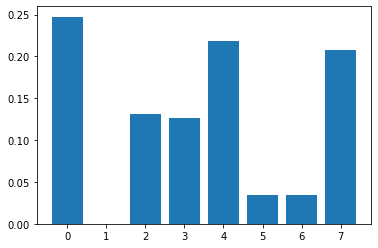

In [31]:
plt.bar(res_gb['phase_number'],res_gb[1])

In [32]:
# 0.000 - no way to get r

In [33]:
# 0.100 = 1/2
(3**2)%5

4

In [34]:
# BUT also 0.100000 = 2/4
(3**4)%5
# and r = 4, so this state seems to be right, but 2^t is an integer multiple of r, so this is reason the algorithm fails here

1

In [35]:
# 0.111 = 7/8. 8 is not an order of 3 modulo 5. Additionally, s/r = 7/8, but s < r < N=5
(3**8)%5

1

In [36]:
# 0.011 = 3/8 - the same reasoning as for 7/8. 
(3**8)%5

1

In [37]:
# 0.010 = 1/4 - this is right. 
(3**4)%5

1